# Basics of Maplotlib
This session is to cover some important visualisations available via `matplotlib`
* Line plot
* Scatter plot
* Histogram

In [29]:
# Import modules
import os
import pandas as pd
import numpy as np
import scipy as sp
## Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as mps
import seaborn as sns
%matplotlib inline
## Set-up jtplot 
# from jupyterthemes import jtplot
# jtplot.style(theme='chesterish')
# jtplot.style(ticks=True, grid=False, figsize=(8, 6))

## Line Plot

In [24]:
## Create a Dataframe
df = pd.DataFrame(np.random.normal(loc=0,scale=0.03,size=60))

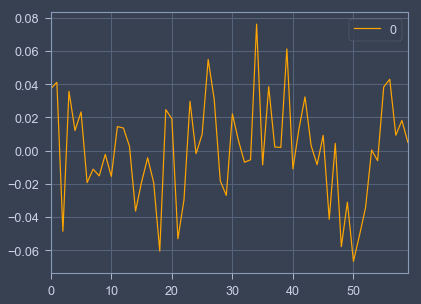

In [25]:
df.plot(color='orange');

In [33]:
df[1] = np.cumsum(df)
df.columns = ['Values','Cumsum']
df.head()

,Values,Cumsum
0,0.037205,0.037205
1,0.041185,0.078389
2,-0.048665,0.029725
3,0.035715,0.065440
4,0.012072,0.077513


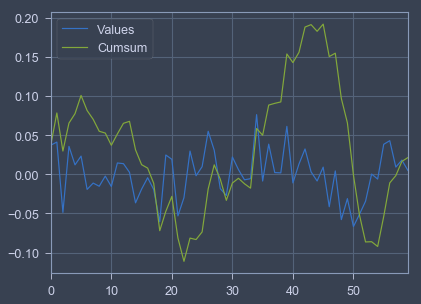

In [34]:
## Compare two series
df.plot();

## Histogram

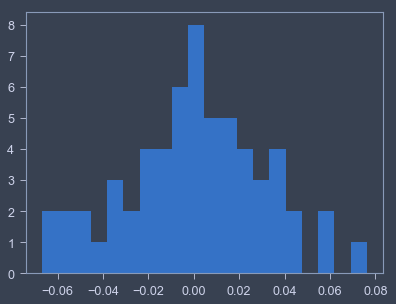

In [42]:
plt.hist(df['Values'],bins=20);

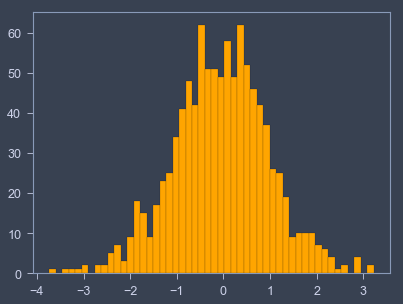

In [48]:
df = pd.Series(np.random.standard_normal(size=1000))
plt.hist(df, bins=50, color='orange',edgecolor='black');

## Scatter Plot

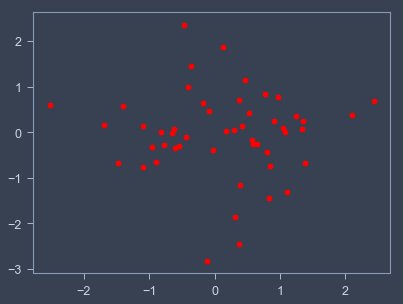

In [55]:
df_scatter = pd.DataFrame({'A':np.random.normal(size=50), 'B':np.random.normal(size=50)})
plt.scatter(df_scatter.A, df_scatter.B, color='red');

# More things about Matplotlib
How to change the plot appreance:
* Adding annotations
* Built-in styles
* Subplots
* Overlays


## Change the appearance

In [97]:
## Dataframe, that you only need to graph several columns
df = pd.DataFrame({'A': np.random.normal(size=60), 'B': np.random.normal(size=60)})
df['C'] = df['B'].cumsum()
x = np.random.normal(100, 15, size=5000)

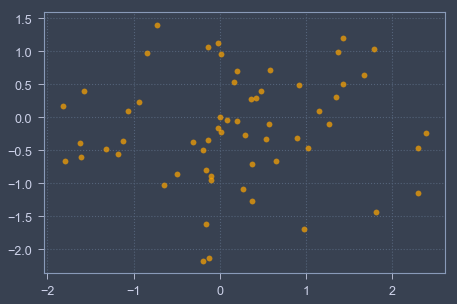

In [104]:
## Set Transparency
plt.scatter(df.A, df.B, alpha=0.7, color='orange')
plt.grid(linestyle=':');

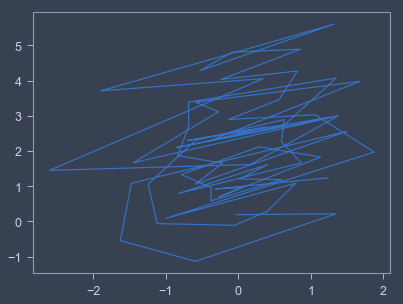

In [61]:
plt.plot(df['B'],df['C']);

''

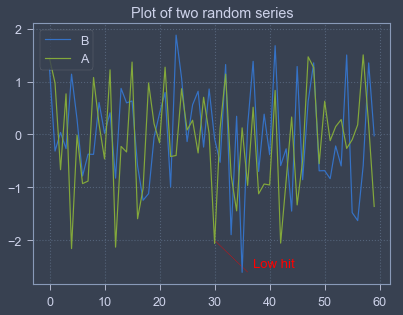

In [84]:
plt.plot(df.B)
plt.plot(df.A)
## Setting the appreance
plt.grid(linestyle=':')
plt.legend(loc=2)
plt.title('Plot of two random series')
## Annotations
plt.text(x=37,y=-2.5,s='Low hit', color='red')
plt.arrow(30,-2,6,-.6, color='red')
## style
mps.use('fast')
;

In [85]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

## Put multiple plots

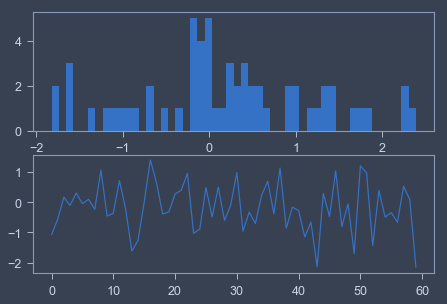

In [105]:
## typically, to put more pltos in a figure, 
## we put a fig as the entire graphic, ax as a plot within that figures
fig, (ax1, ax2) = plt.subplots(2, 1) ## 2 rows and 1 col
ax1.hist(df.A, bins=50)
ax2.plot(df.B);

## Overlay

In [118]:
x = np.random.normal(size=1000)

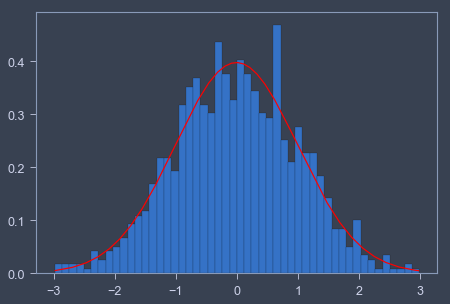

In [119]:
## Actual distribution
plt.hist(x, bins=50, edgecolor='black', density=True); ## set the density to get the standardized by z-score
## Take the empirical estimated density curve (as overlay)
from scipy.stats  import norm
mean, sd = norm.fit(x)
min_x = float(np.min(x))
max_x = float(np.max(x))
overlay = np.linspace(min_x, max_x, 1000)
params = norm.pdf(overlay, mean, sd) ## take the probability density for each values in the linspace, considering their mean and sd
plt.plot(overlay, params,'red');

# Matplotlib API Primer

## Figures & Subplots

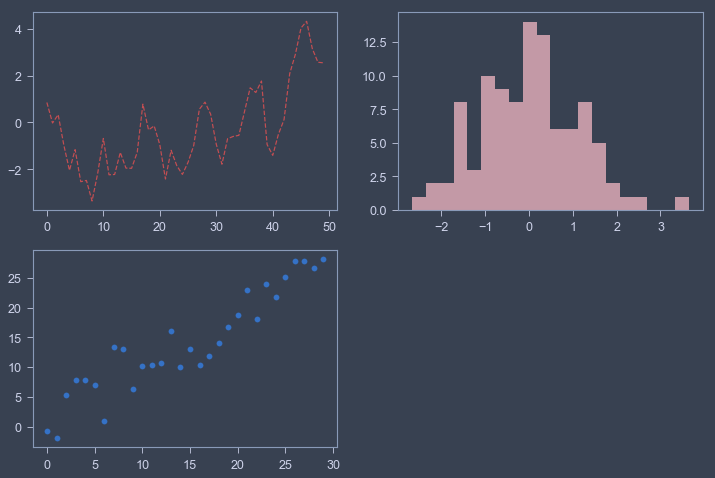

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2, 2, 1) ##add subplot, 2x2 four plots, ax1 numbered as 1
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3) 
ax1.plot(np.random.randn(50).cumsum(), 'r--')
ax2.hist(np.random.randn(100), bins=20, color='pink', alpha=0.7) 
ax3.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

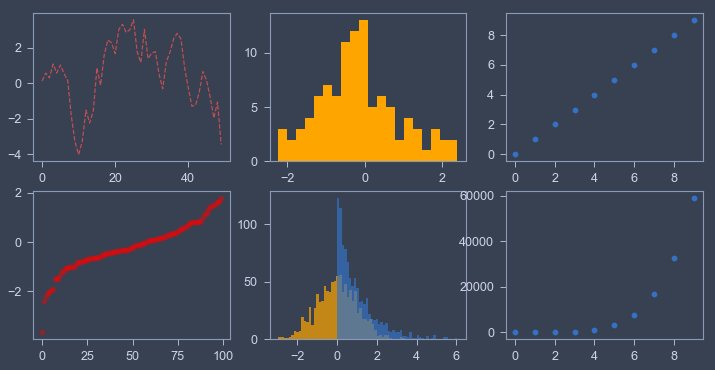

In [65]:
## shorter version
ls = np.random.normal(size=30)
fig, (axes) = plt.subplots(2,3, figsize=(12, 6)) 
## target axes
axes[0][0].plot(np.random.randn(50).cumsum(), 'r--')
axes[0][1].hist(np.random.randn(100), bins=20, color='orange')
axes[0][2].scatter(np.arange(10), np.arange(10))
axes[1][0].scatter(np.arange(100), np.sort(np.random.normal(size=100)), color='red', alpha=0.4)
axes[1][1].hist(np.random.normal(size=1000), bins=50, color='orange', alpha=0.7)
axes[1][1].hist(np.random.exponential(size=1000), bins=50, alpha=0.7)
axes[1][2].scatter(np.arange(10),np.arange(10)**5 + 1);


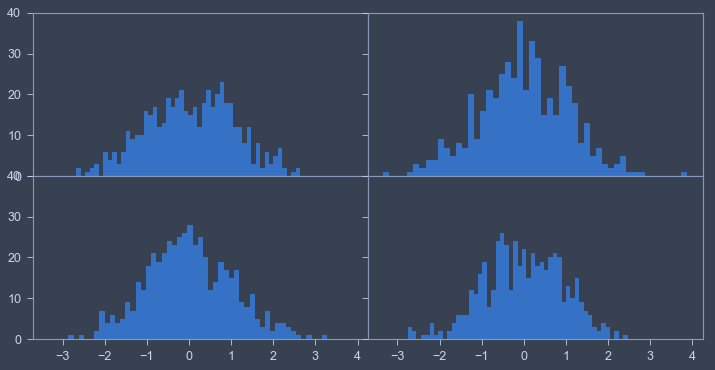

In [70]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(12,6))
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50)
plt.subplots_adjust(wspace=0, hspace=0)

## Colors, Markers, and Line Styles

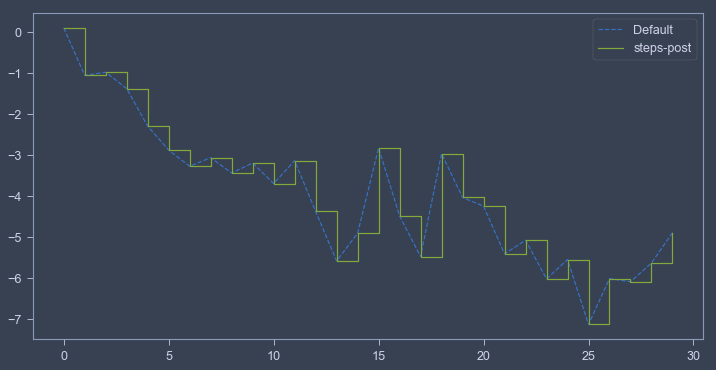

In [77]:
fig = plt.figure(figsize=(12,6))
series = np.random.randn(30).cumsum()
plt.plot(series, '--', label='Default')
plt.plot(series, '-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## Ticks, Lables, and Legends

[Text(0, 0.5, 'Values'), Text(0.5, 1.0, 'change it little bit')]

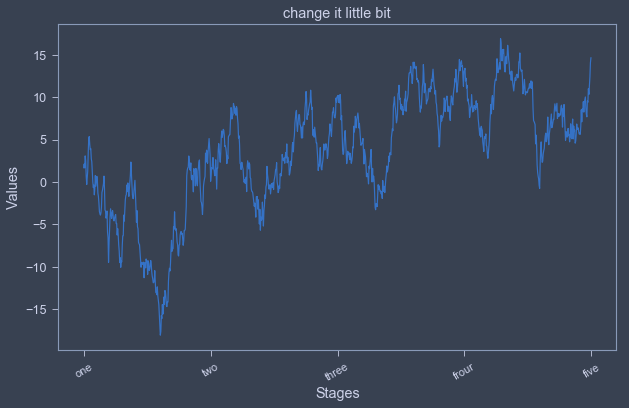

In [92]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
## add ticks
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','frour','five'], rotation=30, fontsize='small')
## label
ax.set_title('Line plot')
ax.set_xlabel('Stages')
## Or
props ={
    'title': 'change it little bit',
    'ylabel': 'Values'
}
ax.set(**props)

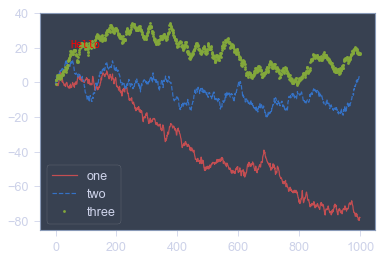

In [5]:
## Legends
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'r', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'b--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'g.', label='three')
ax.legend(loc='best')
## annotations
ax.text(50, 20, 'Hello', family='monospace', fontsize=10, color='red');

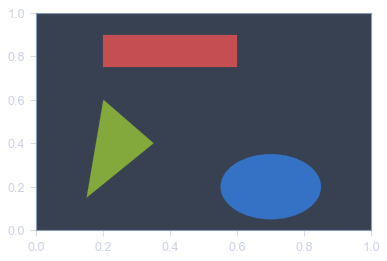

In [6]:
## Add shape
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='r', alpha=1)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=1)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=1)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# Matplotlib Configuration

In [8]:
plt.rc('figure', figsize=(12, 10))
font_options = {
    'family': 'monospace',
    'weight': 'bold',
    'size': 10
}
plt.rc('font', **font_options)

# Plotting with Pandas and Seaborn

## Plot in Pandas: Barchart

In [11]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data

a    0.982680
b    0.748820
c    0.166658
d    0.780524
e    0.403688
f    0.475503
g    0.307411
h    0.519286
i    0.902141
j    0.473856
k    0.348386
l    0.727961
m    0.050098
n    0.740246
o    0.676949
p    0.272321
dtype: float64

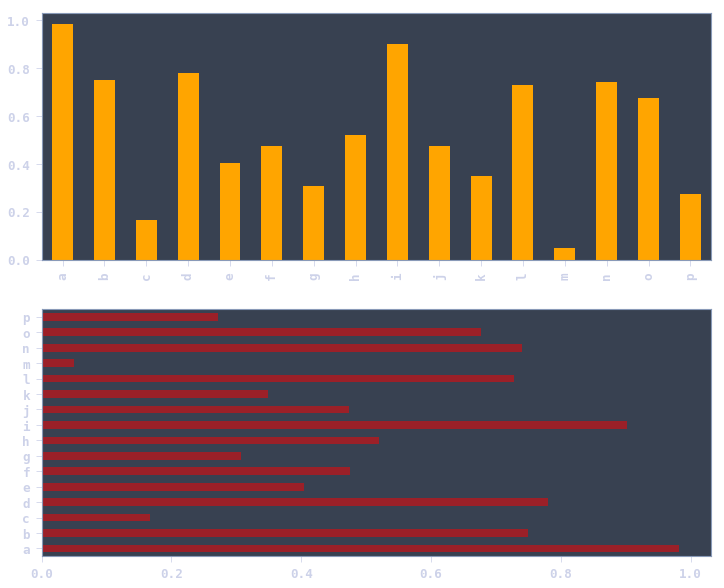

In [17]:
fig, axes = plt.subplots(2,1)
data.plot.bar(ax=axes[0], color='orange');
data.plot.barh(ax=axes[1], color='red', alpha=0.5)

In [18]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

<Figure size 864x288 with 0 Axes>

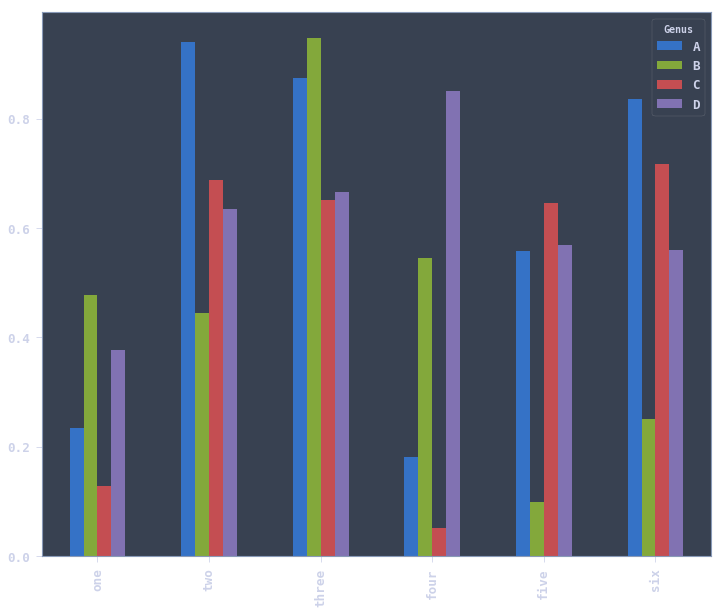

In [28]:
fig = plt.figure(figsize=(12,4))
df.plot.bar()

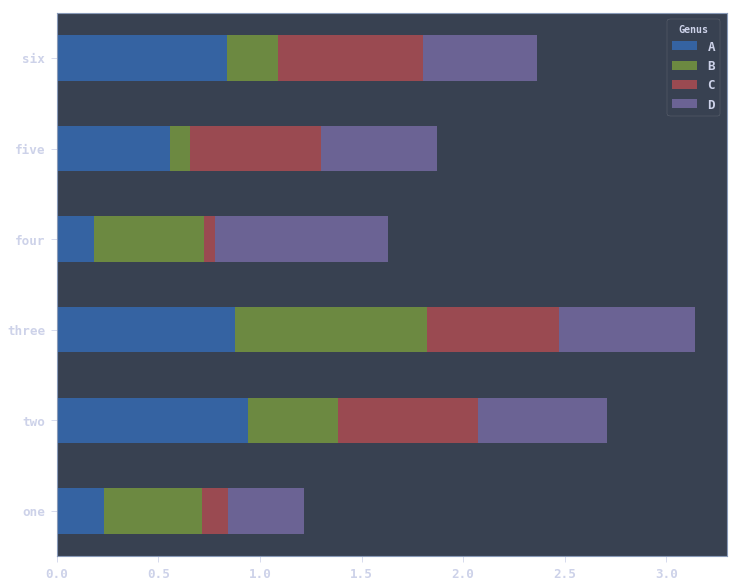

In [26]:
df.plot.barh(stacked=True, alpha=0.7)

## Plot in seaborn

In [65]:
tips = pd.read_csv('../00-Data/tips.csv')
tips['tip_cpt'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_cpt
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


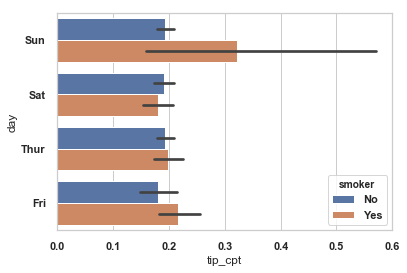

In [42]:
sns.barplot(x='tip_cpt', y='day', hue='smoker', data=tips, orient='h')
sns.set(style='whitegrid')

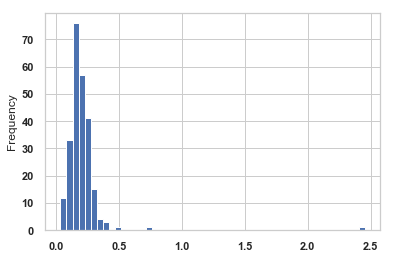

In [41]:
tips['tip_cpt'].plot.hist(bins=50)

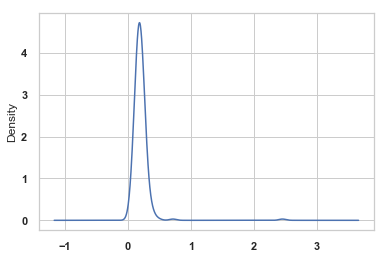

In [43]:
tips['tip_cpt'].plot.density()

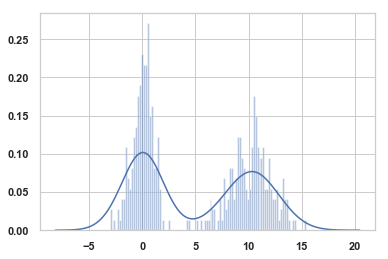

In [47]:
## sns allows to plot both histogram and density on the same plot
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100)

In [53]:
## scatter with regression line fitted
macro = pd.read_csv('../00-Data/macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna() ## compute the log growth rate
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


Text(0.5, 1.0, 'Changes in log %s versus %s')

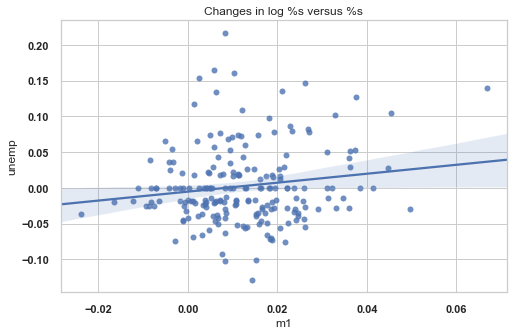

In [62]:
plt.figure(figsize=(8,5))
sns.regplot('m1','unemp', data=trans_data)
plt.title('Changes in log %s versus %s'.format('m1','unemp'))

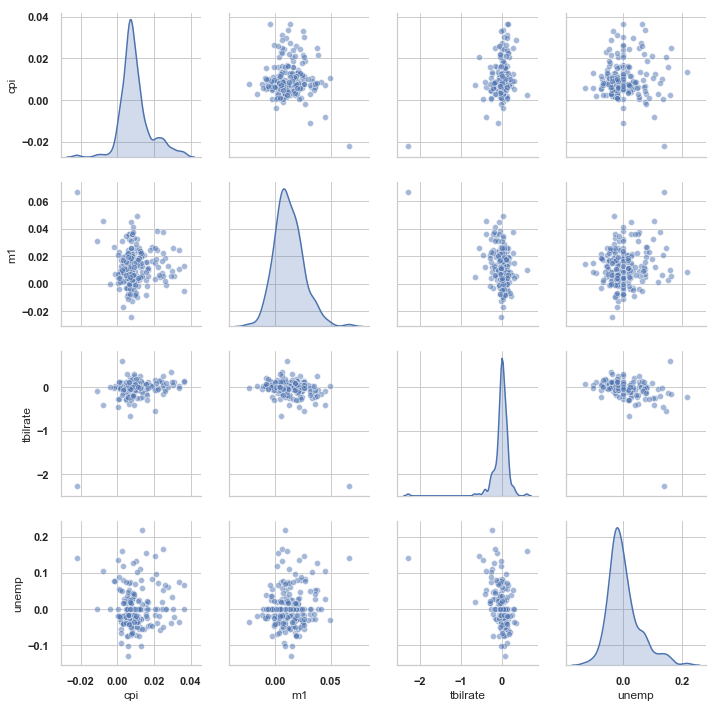

In [61]:
## pairplot to explore
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.5});

## Facet Grids & Categorical Data

/Users/anh.dang/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


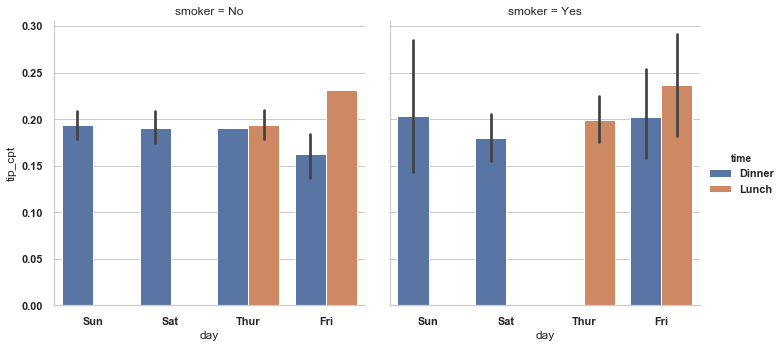

In [72]:
sns.factorplot(data=tips[tips.tip_cpt < 1], x='day', y='tip_cpt', hue='time', 
               col='smoker', 
               kind='bar');

/Users/anh.dang/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


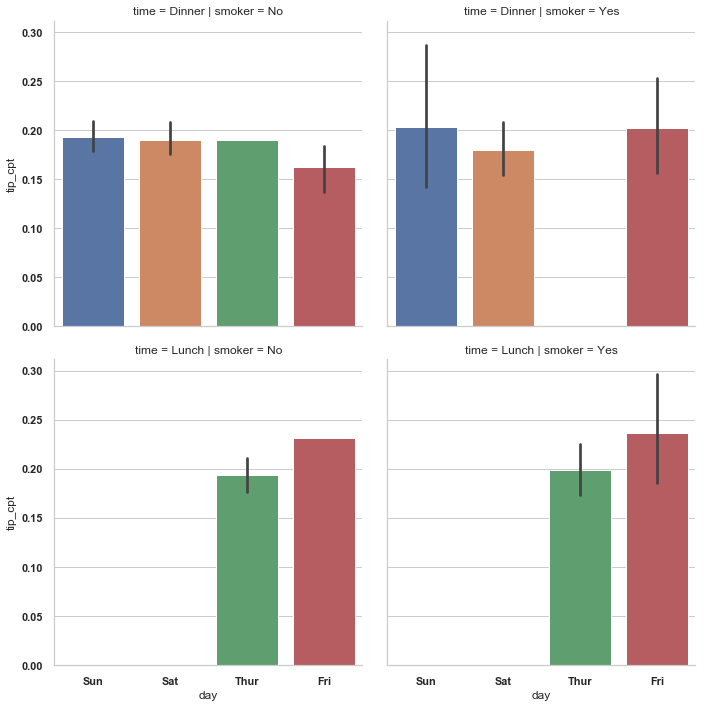

In [73]:
sns.factorplot(data=tips[tips.tip_cpt < 1], x='day', y='tip_cpt', 
               col='smoker', row='time', 
               kind='bar');

/Users/anh.dang/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


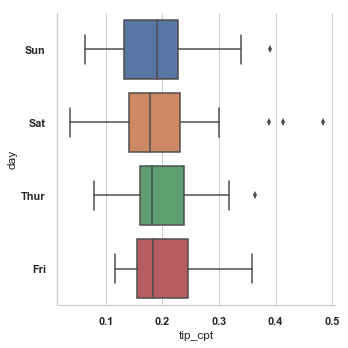

In [75]:
sns.factorplot(data=tips[tips.tip_cpt < 0.5], x='tip_cpt', y='day', kind='box');